In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
sns.set_palette("Set1", 8, .75)
sns.set_style('whitegrid')

# Collect and Examine the Data

In [45]:
customers_df = pd.read_csv('Ecommerce Customers')
customers_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [46]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [47]:
customers_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Explore and Analyze the Data

Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. In a lot of cases, we can see the more time that was spent on the website, the more money that was spent.

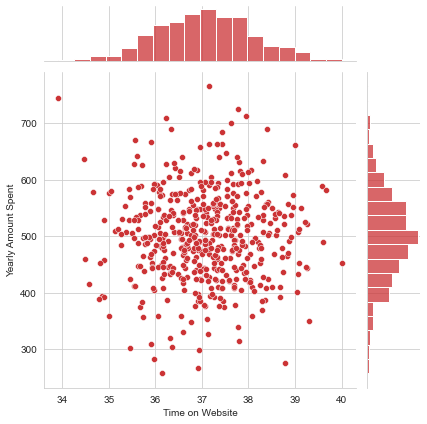

In [54]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers_df,kind='scatter')

Use seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns. The correlation here is even more obvious that the more time spent on the app, the more money that was spent

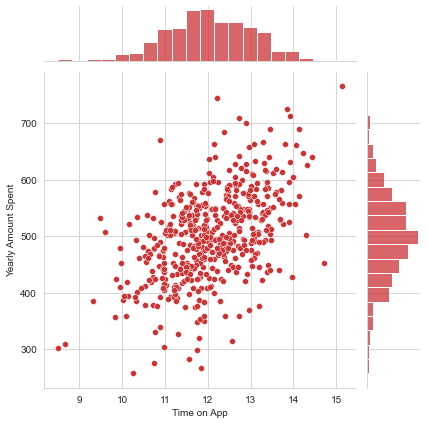

In [55]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers_df,kind='scatter')

Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

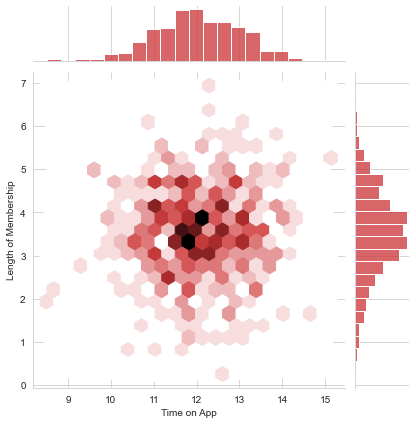

In [56]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers_df,kind='hex')

Let's explore these types of relationships across the entire data set using a pairplot

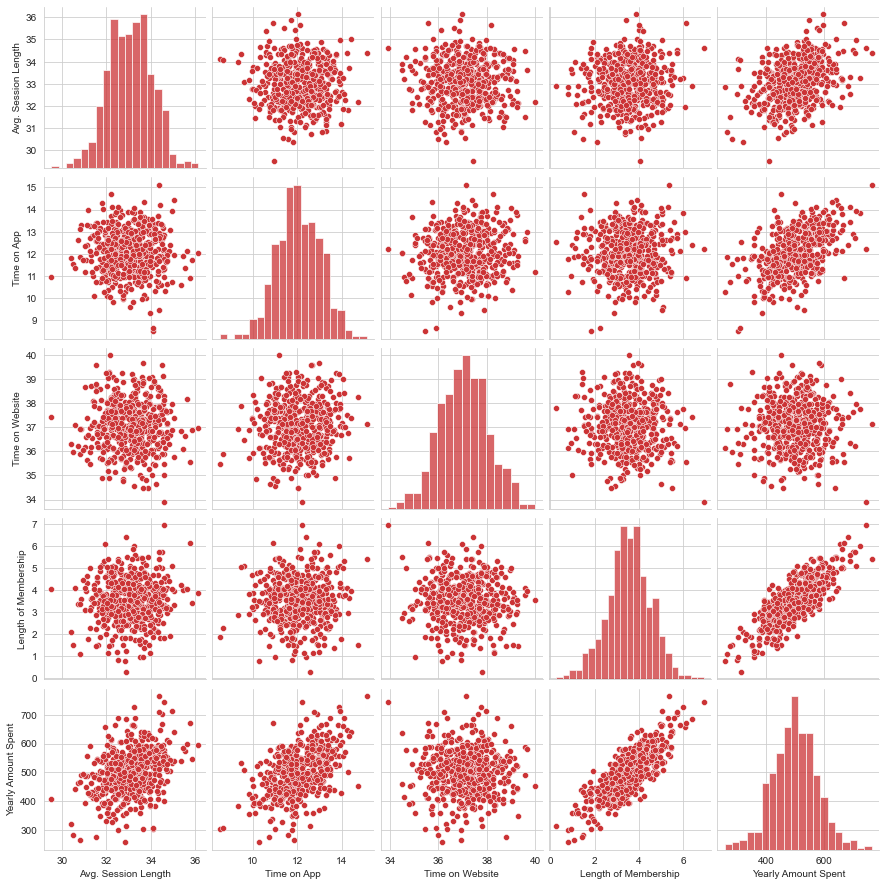

In [57]:
sns.pairplot(customers_df)

In observing this plot, we can see that the most correlated feature with Yearly Amount Spent would be the Length of Membership

Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership. We can see the longer the membership, the more money spent, with most occurences of membership length being between 3 and 4.

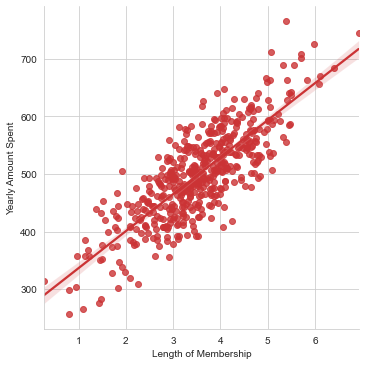

In [58]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customers_df)

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. We will need to first split up our data into an X array that contains the features to train on, which are the numerical customer features, and a y array with the target variable, being the Yearly Amount Spent.

In [59]:
X = customers_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers_df['Yearly Amount Spent']

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

Create an instance of LinearRegression using our training data

In [61]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Print the coefficient of the model

In [62]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data

Now that we have fit our model, we can evaluate its performance by predicting off the test values.

Use lm.predict() to predict off the X_test set of the data.

In [63]:
predictions = lm.predict(X_test)

Create a scatterplot of the real test values versus the predicted values. 

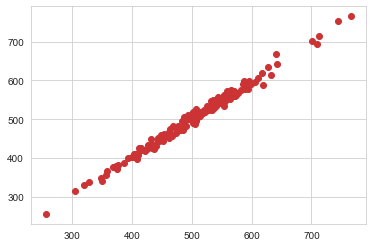

In [64]:
plt.scatter(y_test,predictions)

# Evaluate the Model

Evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [65]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE): 7.228148653430838
Mean Squared Error (MSE): 79.81305165097461
Root Mean Squared Error (RMSE): 8.933815066978642


# Residuals

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


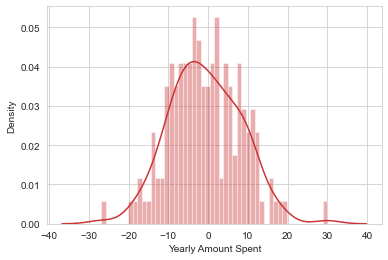

In [66]:
sns.distplot((y_test-predictions),bins=50);

# Conclusion

Let's first create a dataframe of our coefficients

In [67]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.